In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Cross-sell prediction/train.csv')
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [ ]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Exploraty Data Analysis

<p> Xem các thuộc tính ảnh hưởng như thế nào tới 'Response'

<Axes: xlabel='Vehicle_Age', ylabel='count'>

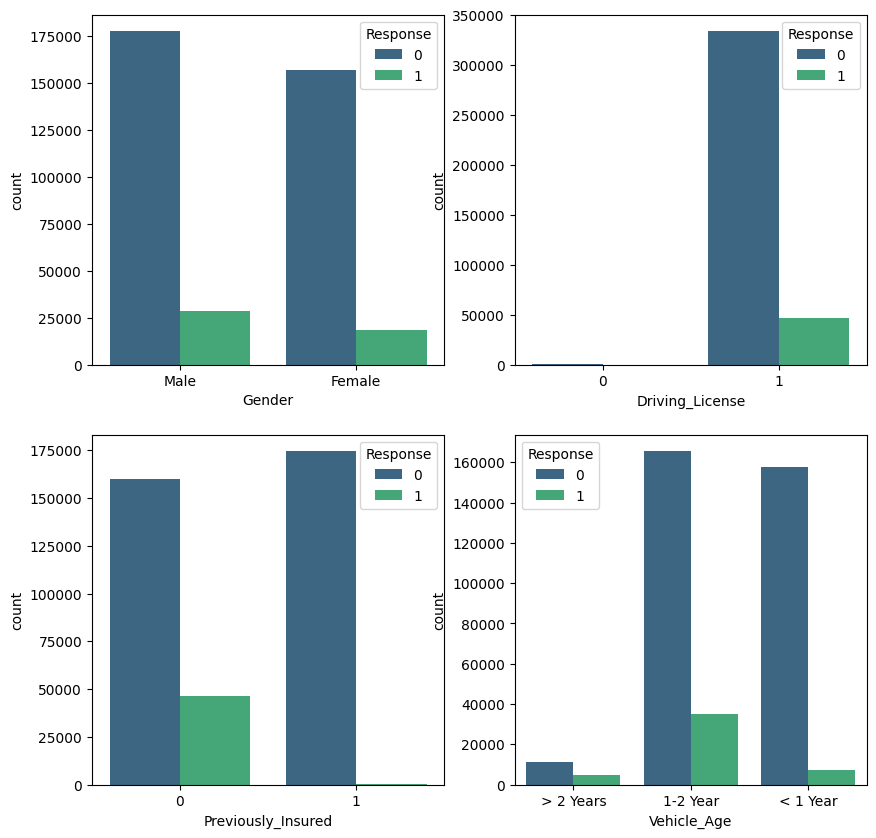

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10)) 

sns.countplot(ax=axes[0,0],x='Gender',hue='Response',data=df,palette="viridis") 
sns.countplot(ax=axes[0,1],x='Driving_License',hue='Response',data=df,palette="viridis") 
sns.countplot(ax=axes[1,0],x='Previously_Insured',hue='Response',data=df,palette="viridis") 
sns.countplot(ax=axes[1,1],x='Vehicle_Age',hue='Response',data=df,palette="viridis")

<Axes: xlabel='Vehicle_Age', ylabel='count'>

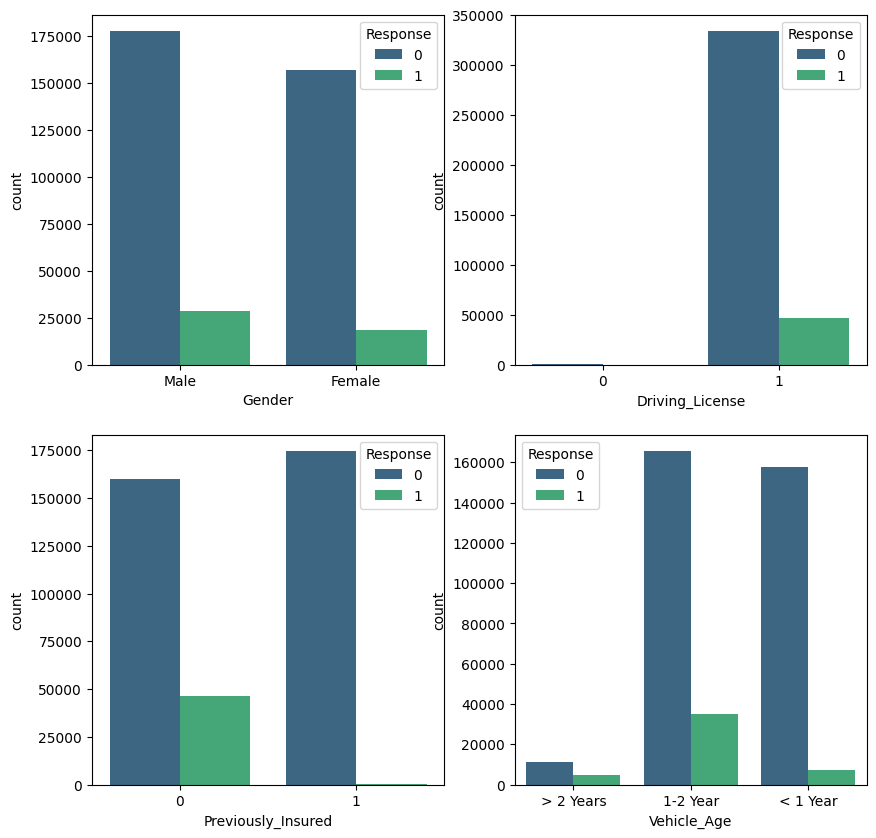

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10)) 
sns.countplot(ax=axes[0,0],x='Gender',hue='Response',data=df,palette="viridis") 
sns.countplot(ax=axes[0,1],x='Driving_License',hue='Response',data=df,palette="viridis") 
sns.countplot(ax=axes[1,0],x='Previously_Insured',hue='Response',data=df,palette="viridis") 
sns.countplot(ax=axes[1,1],x='Vehicle_Age',hue='Response',data=df,palette="viridis")

<Axes: xlabel='Vehicle_Damage', ylabel='count'>

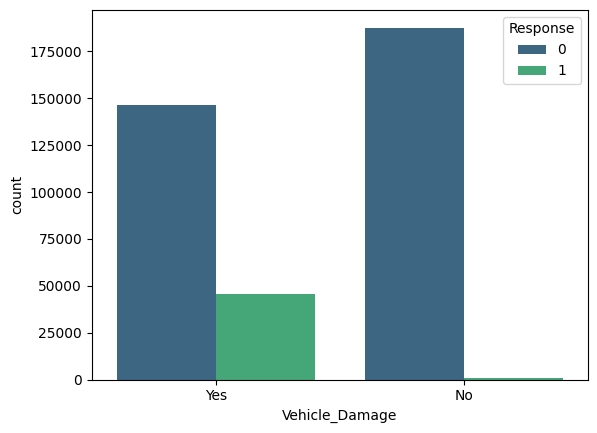

In [ ]:
sns.countplot(x='Vehicle_Damage',hue='Response',data=df,palette="viridis")

<p> độ tuổi của khách hàng

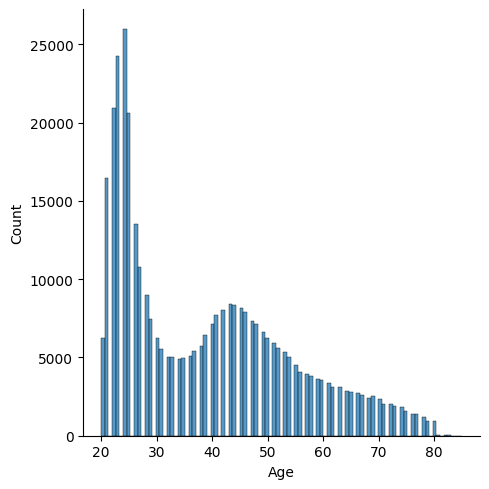

In [ ]:
sns.displot(df['Age'])

<ipython-input-25-60b0b77c6bf9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual_Premium'])


<Axes: xlabel='Annual_Premium', ylabel='Density'>

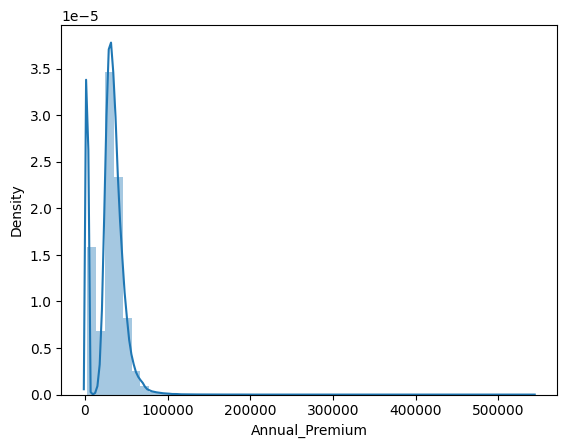

In [ ]:
sns.distplot(df['Annual_Premium'])

<p> Xem dữ liệu có cân bằng không

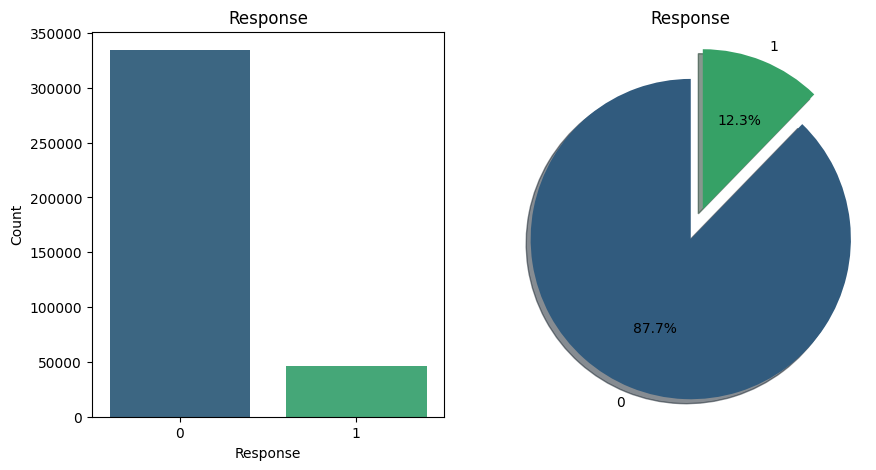

In [ ]:
Response = df.loc[:,"Response"].value_counts().rename('Count')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Bar chart
axs[0].set_xlabel("Response")
axs[0].set_ylabel('Count')
sns.barplot(x=Response.index, y=Response.values, palette="viridis", ax=axs[0])
axs[0].set_title('Response')

# Pie chart
axs[1].pie(Response.values, labels=Response.index, autopct='%1.1f%%', startangle=90, colors=['#315b7e','#36a166'], explode=(0, 0.2), shadow=True)
axs[1].axis('equal')
axs[1].set_title('Response')

plt.show()

<p> Xem xét trường hợp Vehicle_damage có ảnh hương không 

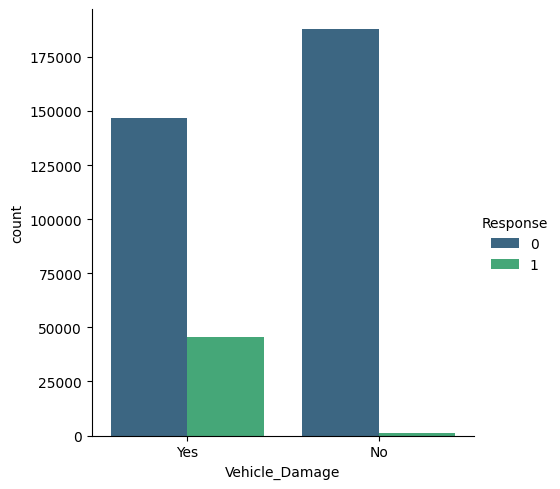

In [ ]:
pivot_table = df.pivot_table(index='Vehicle_Damage', columns='Response', values='id', aggfunc='count')
sns.catplot(x='Vehicle_Damage', hue='Response', data=df, kind='count', palette='viridis')
plt.show()

<Axes: xlabel='Age', ylabel='count'>

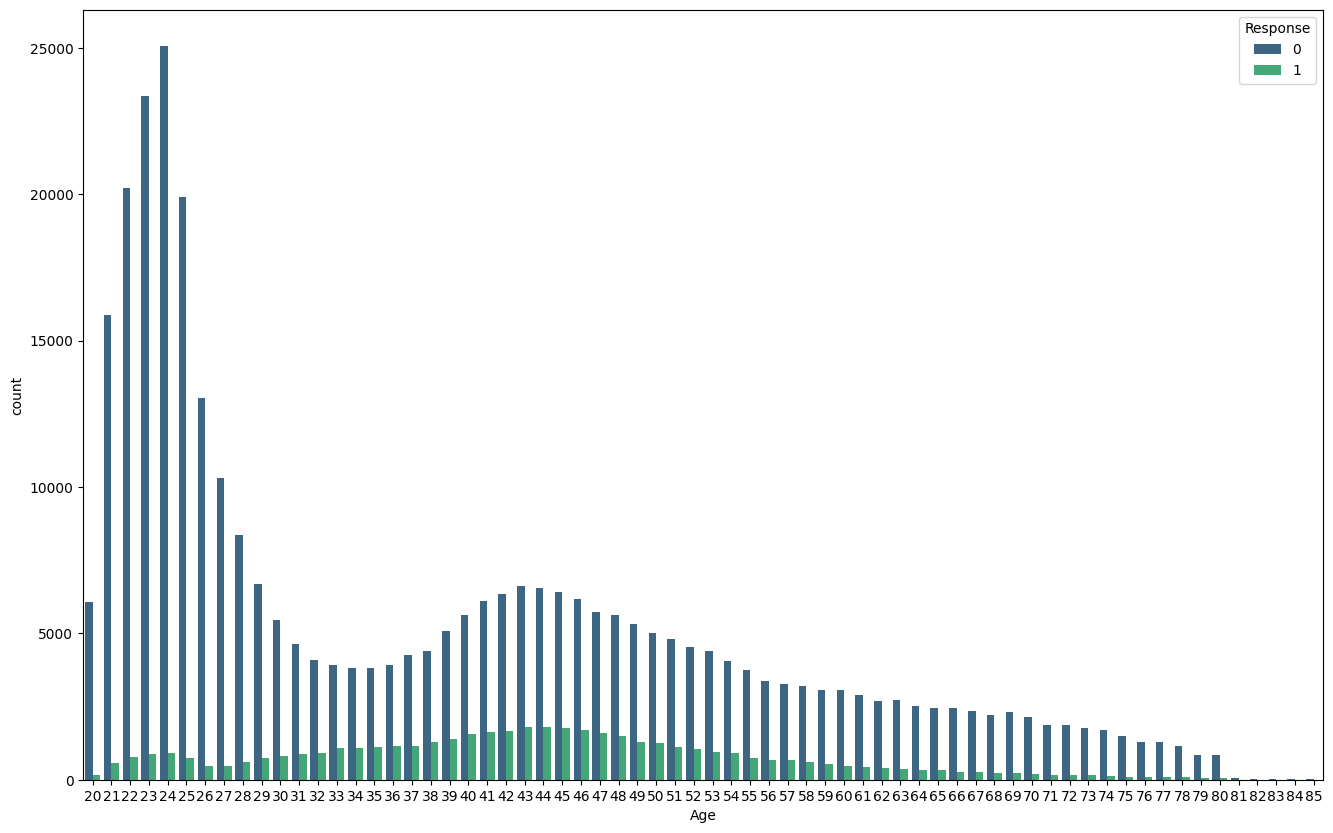

In [ ]:
#Age VS Response
plt.figure(figsize=(16,10))
sns.countplot(x='Age',hue='Response',data=df, palette='viridis')

<Axes: >

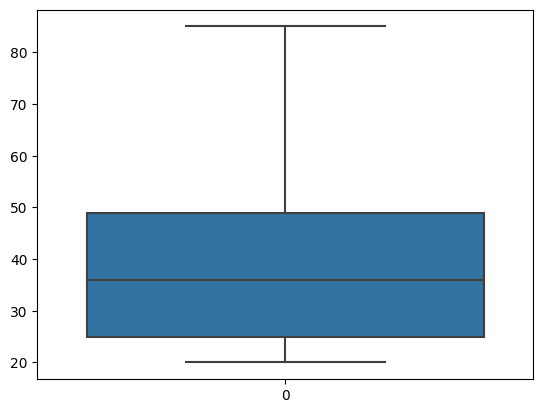

In [ ]:
sns.boxplot(df['Age'])

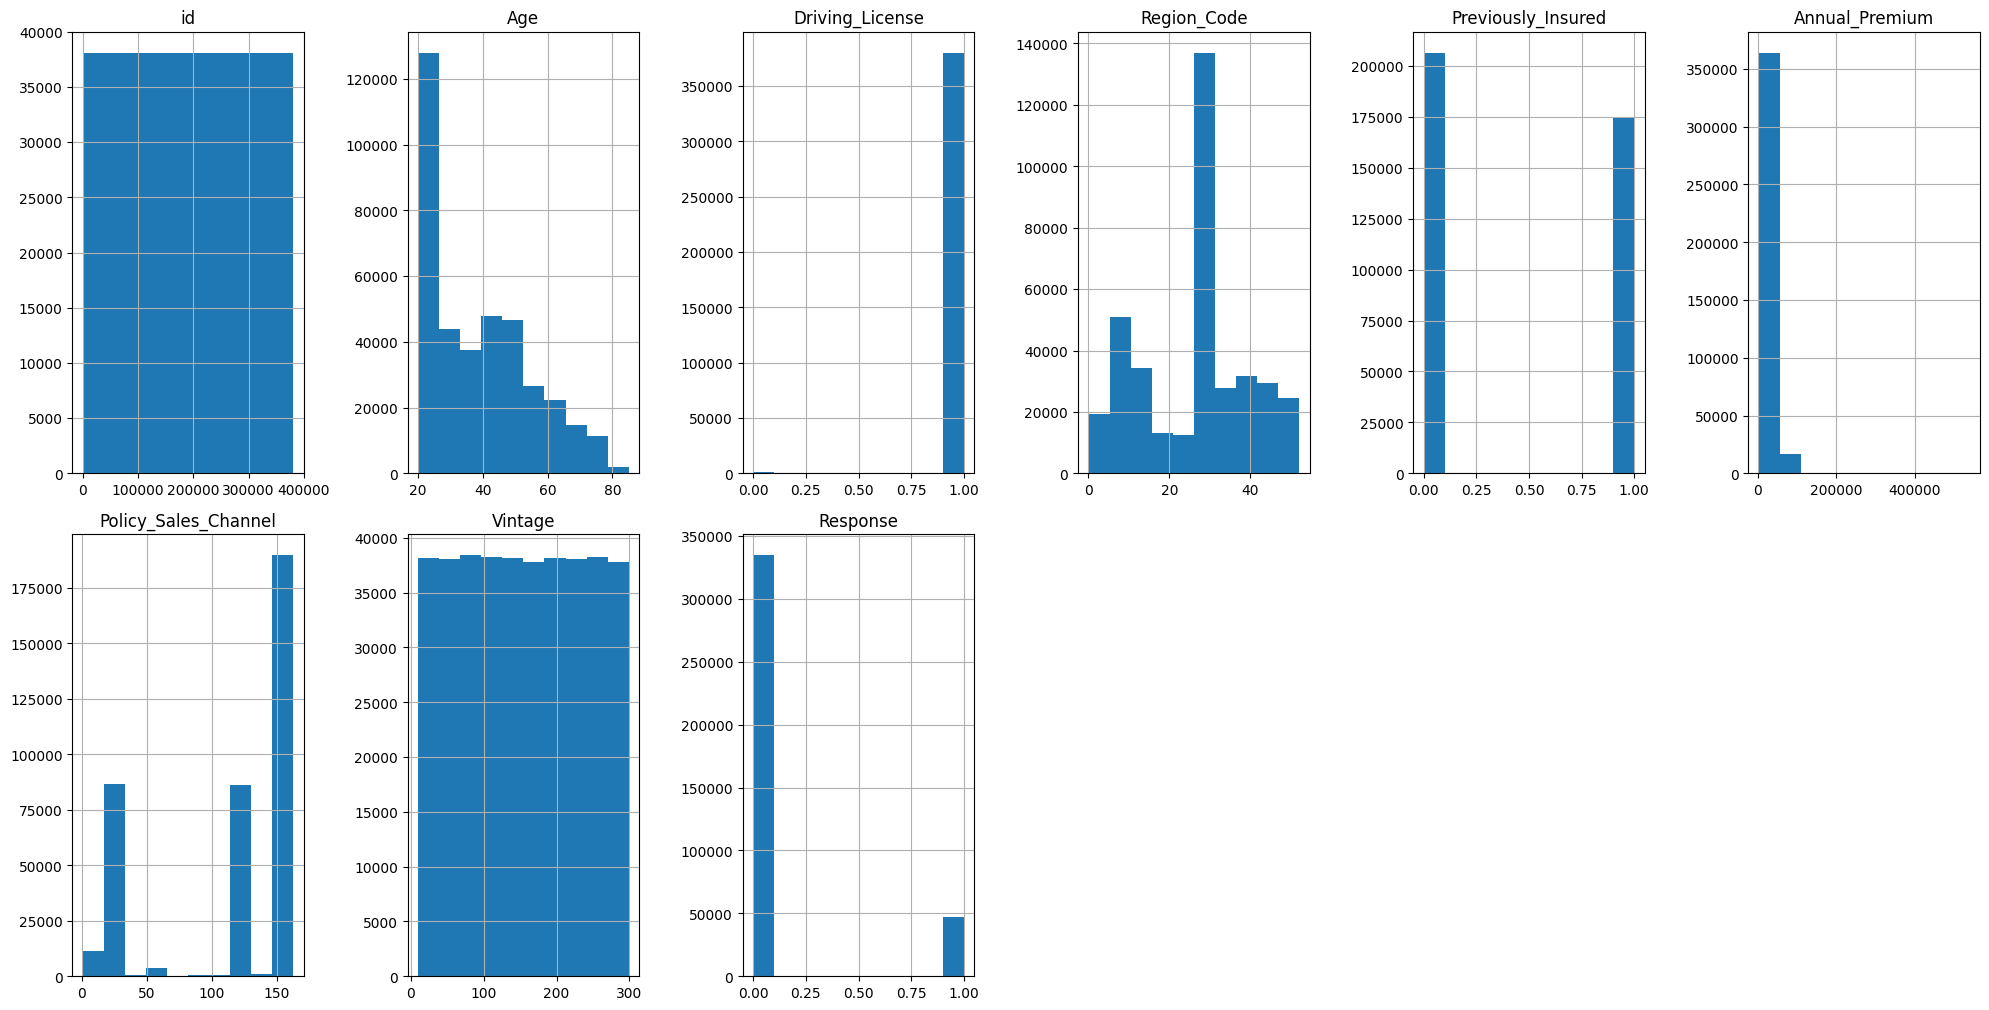

In [ ]:
df.hist(figsize=(20,15),layout=(3,6))
plt.tight_layout()
plt.show()

#### Preprocessing Data

In [ ]:
df.isnull().sum() # không có null

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [4]:
df.drop(columns=['id','Policy_Sales_Channel'], inplace=True)

In [ ]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,39,0
...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,74,0


In [5]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x =='Male' else 0)

In [6]:
scaler = MinMaxScaler()
df[['Age', 'Annual_Premium', 'Vintage']] = scaler.fit_transform(df[['Age', 'Annual_Premium', 'Vintage']]) 

In [7]:
df['Region_Code'] = df['Region_Code'].apply(lambda x: 1 if x==28 else 0)

In [8]:
df = pd.get_dummies(df, columns=['Vehicle_Age'],drop_first=True)

In [9]:
df = pd.get_dummies(df, columns=['Vehicle_Damage'],drop_first=True)

In [ ]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,0.369231,1,1,0,0.070366,0.716263,1,0,1,1
1,1,0.861538,1,0,0,0.057496,0.598616,0,0,0,0
2,1,0.415385,1,1,0,0.066347,0.058824,1,0,1,1
3,1,0.015385,1,0,1,0.048348,0.667820,0,1,0,0
4,0,0.138462,1,0,1,0.046259,0.100346,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,1,0.830769,1,0,1,0.051234,0.269896,0,0,0,0
381105,1,0.153846,1,0,1,0.069551,0.418685,0,1,0,0
381106,1,0.015385,1,0,1,0.060439,0.522491,0,1,0,0
381107,0,0.738462,1,0,0,0.078110,0.221453,0,0,1,1


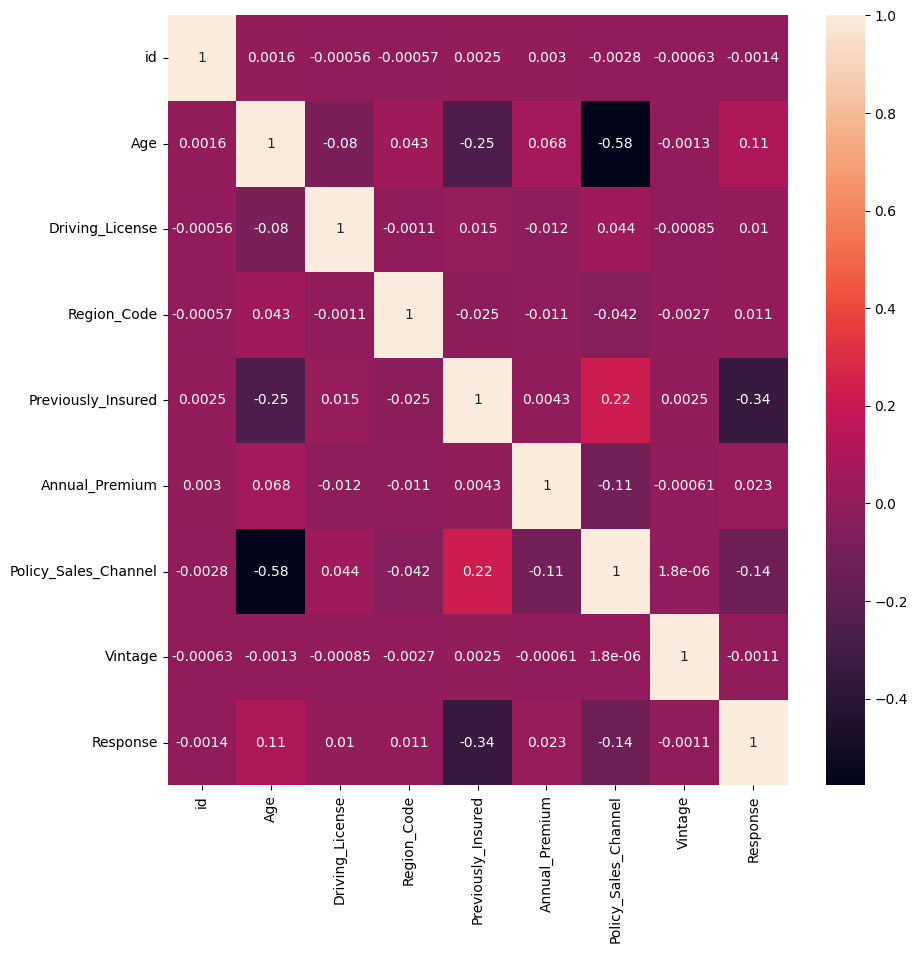

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))   
dataplot = sns.heatmap(df.corr(), annot=True, ax = ax)

In [12]:
X = df.drop(columns='Response')
y = df['Response']

In [ ]:
print(X.shape)
print(y.shape)

(381109, 10)
(381109,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)

(304887, 10)
(304887,)


### Training

In [10]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    
    fig.set_size_inches(8, 6)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

### Use SMOTE

In [14]:
sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
print(X_train_sm.shape)
print(y_train_sm.shape)

(535400, 10)
(535400,)


In [ ]:
y_train_sm.value_counts()

1    267700
0    267700
Name: Response, dtype: int64

#### Logistic Regression


In [15]:
import time

In [16]:
result_time_SMOTE = []
result_accuracy_SMOTE =  []
result_F1score_SMOTE =  []
y_prediction = [] 

In [17]:
class_names =[0,1]

Runtime:  2.4133291244506836

Accuracy: 64.16%

F1 Score: 64.16

COnfusion Matrix:
 [[39641 27058]
 [  258  9265]]
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66699
           1       0.26      0.97      0.40      9523

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222



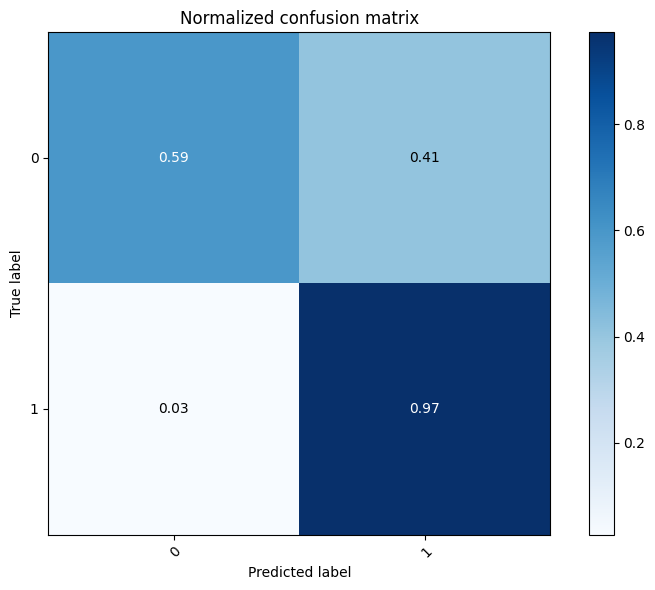

In [18]:
# Logistic Regression
start = time.time()

log = LogisticRegression() 
log.fit(X_train_sm, y_train_sm)
y_pred = log.predict(X_test)
y_prediction.append(y_pred)
end = time.time()
total_time = end-start
print("Runtime: ", total_time)
# In ra du lieu
print("\nAccuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

result_time_SMOTE.append(total_time)
result_accuracy_SMOTE.append(round(accuracy_score(y_test, y_pred) * 100,2))
result_F1score_SMOTE.append(round(f1_score(y_test, y_pred, average='micro') * 100,2))

#### KNN

Runtime:  76.4324734210968
Accuracy: 77.03%

F1 Score: 77.03

COnfusion Matrix:
 [[53717 12982]
 [ 4525  4998]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86     66699
           1       0.28      0.52      0.36      9523

    accuracy                           0.77     76222
   macro avg       0.60      0.67      0.61     76222
weighted avg       0.84      0.77      0.80     76222



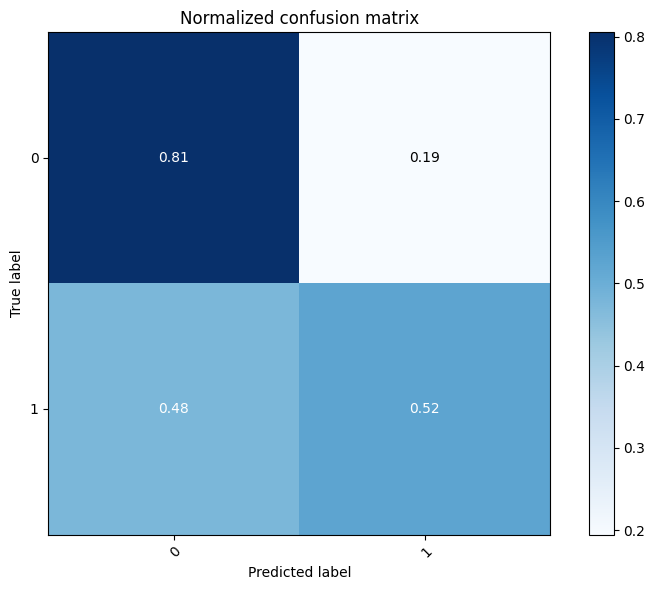

In [21]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time()

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_sm, y_train_sm)
y_pred = knn.predict(X_test)
y_prediction.append(y_pred)
end = time.time()
total_time = end-start
print("Runtime: ", total_time)

# In ra du lieu
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

result_time_SMOTE.append(total_time)
result_accuracy_SMOTE.append(round(accuracy_score(y_test, y_pred) * 100,2))
result_F1score_SMOTE.append(round(f1_score(y_test, y_pred, average='micro') * 100,2))

#### Decision Tree

Runtime:  1.2201206684112549
Accuracy: 64.05%

F1 Score: 64.05

COnfusion Matrix:
 [[39515 27184]
 [  221  9302]]
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66699
           1       0.25      0.98      0.40      9523

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222



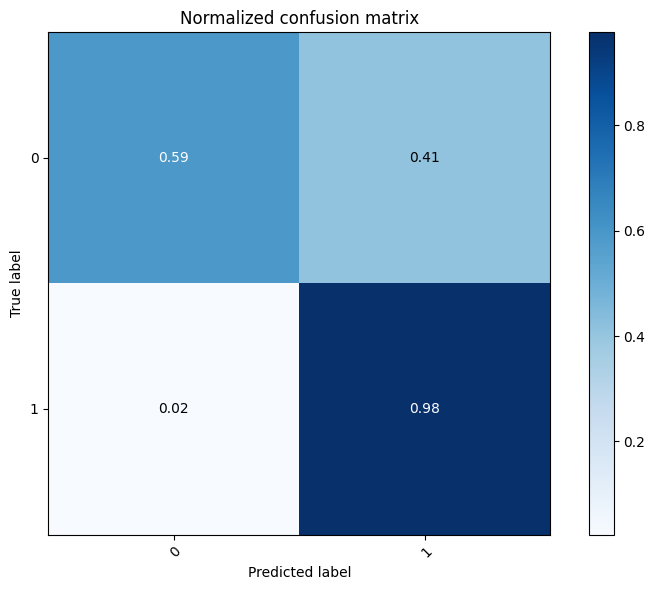

In [23]:
# Decision Tree
start = time.time()

tree = DecisionTreeClassifier(random_state=0, max_depth=2)
tree.fit(X_train_sm, y_train_sm)
y_pred = tree.predict(X_test)
y_prediction.append(y_pred)
end = time.time()
total_time = end-start
print("Runtime: ", total_time)

# In ra du lieu
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

result_time_SMOTE.append(total_time)
result_accuracy_SMOTE.append(round(accuracy_score(y_test, y_pred) * 100,2))
result_F1score_SMOTE.append(round(f1_score(y_test, y_pred, average='micro') * 100,2))

#### Random Forest

Runtime:  142.14402604103088
Accuracy: 79.57%

F1 Score: 79.57

COnfusion Matrix:
 [[56112 10587]
 [ 4982  4541]]
              precision    recall  f1-score   support

           0       0.92      0.84      0.88     66699
           1       0.30      0.48      0.37      9523

    accuracy                           0.80     76222
   macro avg       0.61      0.66      0.62     76222
weighted avg       0.84      0.80      0.81     76222



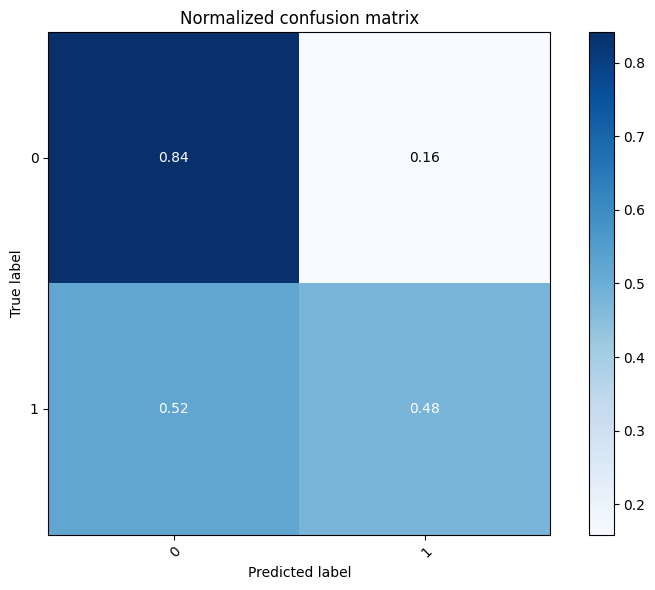

In [24]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_sm, y_train_sm)
y_pred = rf.predict(X_test)
y_prediction.append(y_pred)
end = time.time()
total_time = end-start
print("Runtime: ", total_time)

# In ra du lieu
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

result_time_SMOTE.append(total_time)
result_accuracy_SMOTE.append(round(accuracy_score(y_test, y_pred) * 100,2))
result_F1score_SMOTE.append(round(f1_score(y_test, y_pred, average='micro') * 100,2))

#### MLP

Runtime:  41.611311197280884
Accuracy: 70.96%

F1 Score: 70.96

COnfusion Matrix:
 [[45424 21275]
 [  863  8660]]
              precision    recall  f1-score   support

           0       0.98      0.68      0.80     66699
           1       0.29      0.91      0.44      9523

    accuracy                           0.71     76222
   macro avg       0.64      0.80      0.62     76222
weighted avg       0.89      0.71      0.76     76222



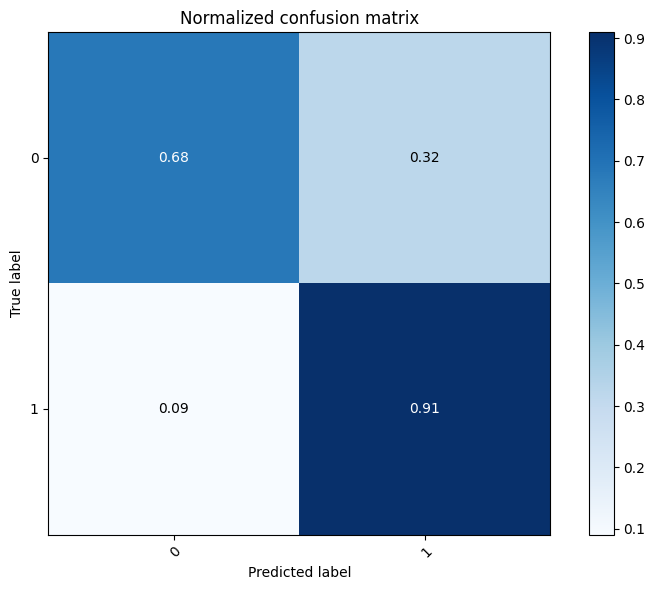

In [25]:
from sklearn.neural_network import MLPClassifier

start = time.time()

mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
mlp.fit(X_train_sm, y_train_sm)
y_pred = mlp.predict(X_test)
y_prediction.append(y_pred)
end = time.time()
total_time = end-start
print("Runtime: ", total_time)

# In ra du lieu
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

result_time_SMOTE.append(total_time)
result_accuracy_SMOTE.append(round(accuracy_score(y_test, y_pred) * 100,2))
result_F1score_SMOTE.append(round(f1_score(y_test, y_pred, average='micro') * 100,2))

#### Navie Bayes

Runtime:  0.1324610710144043
Accuracy: 64.15%

F1 Score: 64.15

COnfusion Matrix:
 [[39600 27099]
 [  229  9294]]
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66699
           1       0.26      0.98      0.40      9523

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222



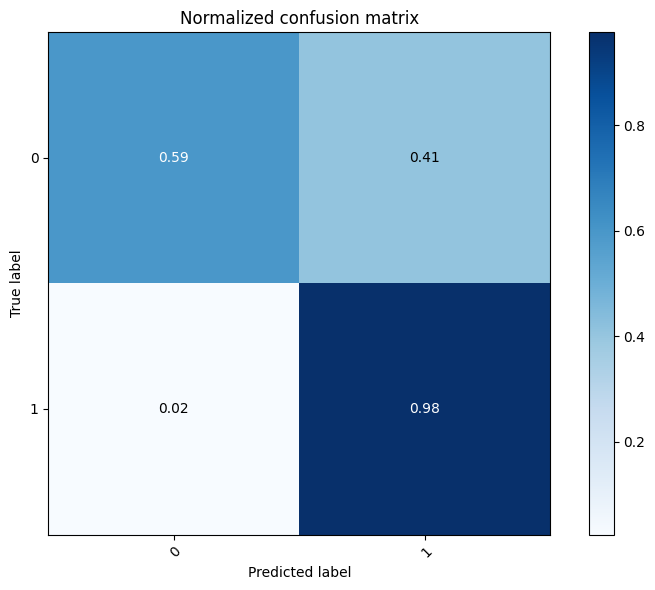

In [26]:
from sklearn.naive_bayes import GaussianNB

start = time.time()

nb = GaussianNB()
nb.fit(X_train_sm, y_train_sm)
y_pred = nb.predict(X_test)
y_prediction.append(y_pred)
end = time.time()
total_time = end-start
print("Runtime: ", total_time)

# In ra du lieu
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

result_time_SMOTE.append(total_time)
result_accuracy_SMOTE.append(round(accuracy_score(y_test, y_pred) * 100,2))
result_F1score_SMOTE.append(round(f1_score(y_test, y_pred, average='micro') * 100,2))

#### K-fold

In [ ]:
# KFold

from sklearn.model_selection import KFold

start = time.time()

kf = KFold(n_splits=10)

accuracy = []

for train_index, test_index in kf.split(X_train,y_train):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]

    X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

    rf = RandomForestClassifier(n_estimators=100).fit(X_train_resampled, y_train_resampled)

    y_pred = rf.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    

end = time.time()
print("Mean accuracy: ", np.mean(accuracy))
total_time = end - start
print(f"Total time: {total_time} seconds")

result_time_SMOTE.append(total_time)
result_accuracy_SMOTE.append(round(np.mean(accuracy) * 100,2))

Mean accuracy:  0.8002843989577733
Total time: 556.2969567775726 seconds


#### ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=10, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,609
Trainable params: 4,609
Non-trainabl

In [ ]:
start = time.time() 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Cross-sell prediction/best_weights.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
history = model.fit(X_train_sm, y_train_sm, epochs=50, batch_size=32,validation_data = (X_test, y_test), callbacks=[checkpoint])
end = time.time()
total_time = end-start


Epoch 1/50
16722/16732 [============================>.] - ETA: 0s - loss: 0.4296 - accuracy: 0.7941
Epoch 1: val_accuracy improved from -inf to 0.69111, saving model to /content/drive/MyDrive/Cross-sell prediction/best_weights.h5
16732/16732 [==============================] - 74s 4ms/step - loss: 0.4296 - accuracy: 0.7941 - val_loss: 0.4962 - val_accuracy: 0.6911
Epoch 2/50
16725/16732 [============================>.] - ETA: 0s - loss: 0.4290 - accuracy: 0.7947
Epoch 2: val_accuracy improved from 0.69111 to 0.71455, saving model to /content/drive/MyDrive/Cross-sell prediction/best_weights.h5
16732/16732 [==============================] - 69s 4ms/step - loss: 0.4290 - accuracy: 0.7947 - val_loss: 0.4573 - val_accuracy: 0.7145
Epoch 3/50
16729/16732 [============================>.] - ETA: 0s - loss: 0.4285 - accuracy: 0.7948
Epoch 3: val_accuracy did not improve from 0.71455
16732/16732 [==============================] - 69s 4ms/step - loss: 0.4285 - accuracy: 0.7948 - val_loss: 0.4770 -

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/Cross-sell prediction/best_weights.h5')

In [ ]:
def history_model(model):

  fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

  ax[0].plot(model.history.history['accuracy'], label='Training Accuracy')
  ax[0].plot(model.history.history['val_accuracy'], label='Validation Accuracy')
  ax[0].set_title('Model Accuracy ')
  ax[0].set_ylabel('Accuracy')
  ax[0].legend(loc='lower right')

  ax[1].plot(model.history.history['loss'], label='Training Loss')
  ax[1].plot(model.history.history['val_loss'], label='Validation Loss')
  ax[1].set_title('Model Loss')
  ax[1].set_ylabel('Loss')
  ax[1].set_xlabel('Epoch')
  ax[1].legend(loc='upper right')

  plt.show()

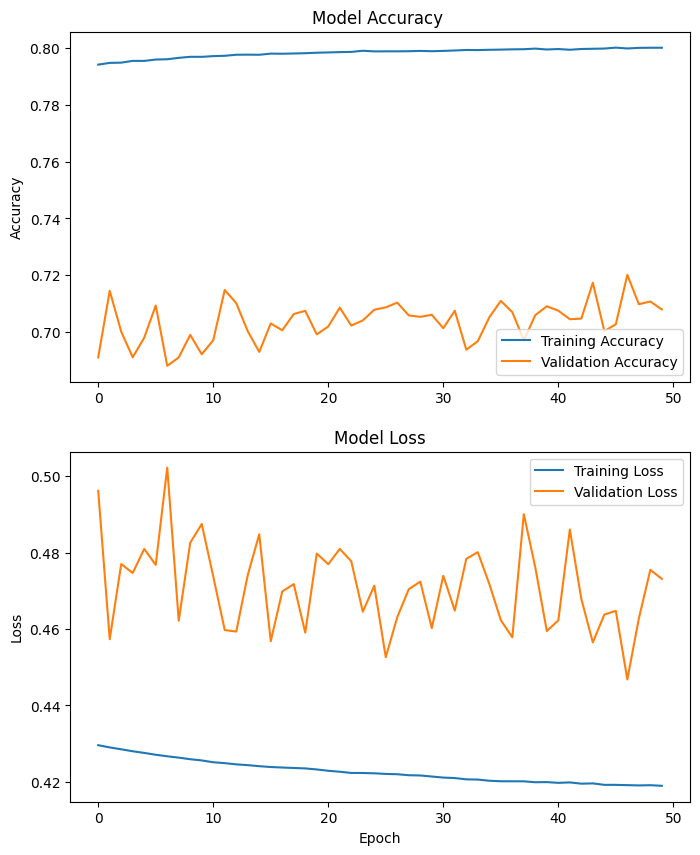

In [ ]:
history_model(model)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss:', loss)
print('accuracy:', accuracy)

563/563 [==============================] - 3s 5ms/step - loss: 0.4731 - accuracy: 0.7080
Loss: 0.4731167256832123
accuracy: 0.7079930901527405


In [ ]:
models = ['Logistic', 'KNN', 'Decision', 'RandomForest','MLP', 'NavieBayes']
data = {'time': result_time_SMOTE, 'accuracy': result_accuracy_SMOTE, 'f1_score': result_F1score_SMOTE}
df = pd.DataFrame(data=data, index=models)
df

,time,accuracy,f1_score
Logistic,2.429736,64.16,64.16
KNN,88.321866,76.93,76.93
Decision,0.419784,64.05,64.05
RandomForest,110.867676,79.65,79.65
MLP,96.736295,67.91,67.91
NavieBayes,0.234141,64.15,64.15


#### GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_sm, y_train_sm)


print(grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# In ra du lieu
print("Total time: {:.2f}".format(end-start))
print("\nAccuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression()

# Define the hyperparameters and their possible values to tune
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Create a GridSearchCV object
clf = GridSearchCV(logreg, param_grid, cv=5)

# Fit the GridSearchCV object to the training set
clf.fit(X_train_sm, y_train_sm)

# Print the best hyperparameters
print("Best hyperparameters: ", clf.best_params_)

# Use the best hyperparameters to predict the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set

Best hyperparameters:  {'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.6404187767311275


In [ ]:
# In ra du lieu

print("\nAccuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(y_test, y_pred, average='micro') * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()


Accuracy: 64.04%

F1 Score: 64.04

COnfusion Matrix:
 [[39518 27181]
 [  227  9296]]
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66699
           1       0.25      0.98      0.40      9523

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222



NameError: ignored

#### AUC-ROC

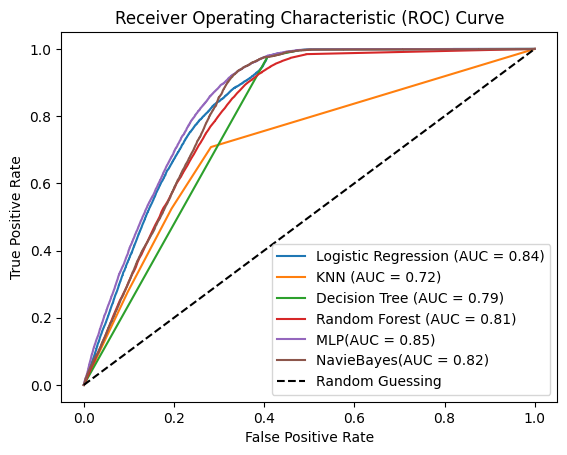

In [27]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_predict
'''
# Create classifiers
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)

# Fit classifiers on the training data
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predict probabilities of positive class for the testing data
lr_probs = lr.predict_proba(X_test)[:, 1]
dt_probs = dt.predict_proba(X_test)[:, 1]
svm_probs = svm.predict_proba(X_test)[:, 1]
'''
lr_probs = log.predict_proba(X_test)[:, 1]
knn_probs  = knn.predict_proba(X_test)[:, 1]
dt_probs  = tree.predict_proba(X_test)[:, 1]
rf_probs  = rf.predict_proba(X_test)[:, 1]
mlp_probs  = mlp.predict_proba(X_test)[:, 1]
nb_probs  = nb.predict_proba(X_test)[:, 1]
# Compute ROC curve and AUC for each classifier

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)


lr_auc = auc(lr_fpr, lr_tpr)
knn_auc = auc(knn_fpr, knn_tpr)
dt_auc = auc(dt_fpr, dt_tpr)
rf_auc = auc(rf_fpr, rf_tpr)
mlp_auc = auc(mlp_fpr, mlp_tpr)
nb_auc = auc(nb_fpr, nb_tpr)

# Plot ROC curves for each classifier
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(mlp_fpr, mlp_tpr, label=f'MLP(AUC = {mlp_auc:.2f})')
plt.plot(nb_fpr, nb_tpr, label=f'NavieBayes(AUC = {nb_auc:.2f})')



# Plot ROC curve for random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Set plot parameters
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Not use SMOTE